In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
consorcios_raw = pd.read_csv("../../data/raw/expensas_consorcios.csv",
                         sep = ";",
                         na_values = "NULL",
                         dtype = {
                            "id": "object",
                        })

unidades_raw = pd.read_csv("../../data/raw/expensas_unidades.csv",
                         sep = ";",
                         na_values = "NULL",
                         dtype = {
                            "id": "object",
                            "consorcio_id":"object"
                        })

## Consorcios

In [32]:
consorcios_raw.columns

Index(['id', 'name', 'direction', 'phone', 'image', 'limitDayToPay',
       'limitDayToPay2', 'chargePerDay', 'chargePerMonth', 'modoPago',
       'costoEol', 'conRedondeo', 'visibilidadGastos',
       'agrupaUnidadesProrrateo', 'tipo', 'updated', 'created', 'fechaInicial',
       'deleted', 'tipoProrrateo', 'agrupaGastosPorCategoria',
       'formaProrrateo', 'usa_fondo', 'fondo_reserva', 'soloMuestraCategorias',
       'info_adicional', 'samply_beneficiario_id', 'samply_client_id',
       'samply_secret', 'administracion_id', 'localidad', 'provincia',
       'codigo_postal', 'clave_sutherh', 'cuit'],
      dtype='object')

In [45]:
consorcios = consorcios_raw.loc[consorcios_raw.deleted == 0, ["id","name", "modoPago", "tipo", "formaProrrateo", "tipoProrrateo"]]

In [35]:
consorcios.shape

(466, 4)

In [39]:
 consorcios.groupby("modoPago").count()

,id,name,tipo
modoPago,,,
mes_adelantado,154,154,154
mes_vencido,312,312,312


In [40]:
 consorcios.groupby("tipo").count()

,id,name,modoPago
tipo,,,
country,1,1,1
normal,463,463,463
torre,2,2,2


Esta variable no sirve

In [44]:
 consorcios.groupby("formaProrrateo").count()

,id,name,modoPago,tipo
formaProrrateo,,,,
normal,226,226,226,226
presupuesto,240,240,240,240


In [46]:
 consorcios.groupby("tipoProrrateo").count()

,id,name,modoPago,tipo,formaProrrateo
tipoProrrateo,,,,,
balance,349,349,349,349,349
detalle,103,103,103,103,103


## Unidades

In [47]:
unidades_raw.columns

Index(['id', 'denomination', 'consorcio_id', 'meters', 'saldo', 'status',
       'type_id', 'updated', 'created', 'deleted', 'propietario_id',
       'consorcio_grupo_id', 'notas', 'locacion', 'manzana', 'lote',
       'sort_order', 'exenta_cobro', 'estudio_juridico_id',
       'exenta_reporte_mora', 'expensas_impresas', 'direccion_impresa',
       'saldo_notas', 'sup_total', 'sup_cubierta', 'unidad_funcional',
       'bloqueada_panel'],
      dtype='object')

In [53]:
unidades_raw.shape

(47043, 27)

In [77]:
unidades = unidades_raw.loc[unidades_raw.consorcio_id.isin(consorcios.id),:]

In [52]:
unidades.shape

(17665, 27)

#### Meters

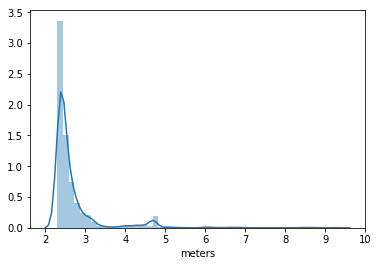

In [63]:
sns.distplot(np.log(unidades.meters+ 10))

Esta variable no sirve de mucho

## Type

In [72]:
unidades_tipo = unidades.groupby("type_id").count()["id"].reset_index().sort_values("id")

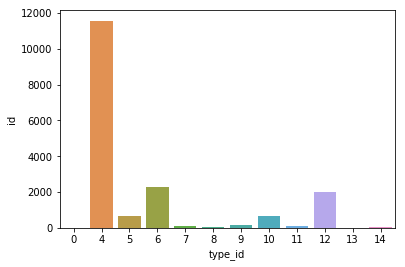

In [74]:
sns.barplot(data=unidades_tipo, x="type_id", y="id")

## Unidades y Consorcios

In [82]:
unidades_consorcio = pd.merge(consorcios,
                              unidades,
                              left_on="id",
                              right_on="consorcio_id",
                              suffixes = ("","_unidad"))

In [87]:
unidad_por_consorcio = unidades_consorcio.groupby("consorcio_id").count()["id_unidad"].reset_index()

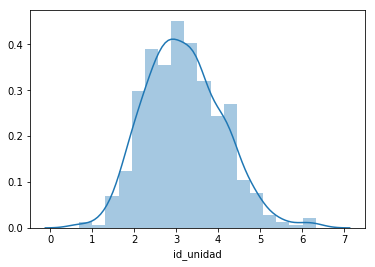

In [93]:
sns.distplot(np.log(unidad_por_consorcio.id_unidad))

Interesante la distribucion de la cantidad de unidades por consorcio